In [2]:
import numpy as np 
import pandas as pd

import os
dir_black = os.path.join('../Black Soil')
dir_Cinder = os.path.join('../Cinder Soil')
dir_Laterite = os.path.join('../Laterite Soil')
dir_peat = os.path.join('../Peat Soil')
dir_yellow = os.path.join('../Yellow Soil')

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '', 
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

Found 500 images belonging to 5 classes.


In [8]:
import PIL
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [9]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [10]:
model = tf.keras.models.Sequential([
    
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [12]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [13]:
total_sample = train_generator.n
n_epochs = 30

In [14]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30
50/50 [==============================] - 38s 688ms/step - loss: 1.4347 - acc: 0.3220
Epoch 2/30
50/50 [==============================] - 26s 520ms/step - loss: 1.0740 - acc: 0.4760
Epoch 3/30
50/50 [==============================] - 26s 520ms/step - loss: 1.0106 - acc: 0.5640
Epoch 4/30
50/50 [==============================] - 26s 526ms/step - loss: 0.7995 - acc: 0.6680
Epoch 5/30
50/50 [==============================] - 26s 515ms/step - loss: 0.6951 - acc: 0.7680
Epoch 6/30
50/50 [==============================] - 26s 516ms/step - loss: 0.6425 - acc: 0.7720
Epoch 7/30
50/50 [==============================] - 26s 525ms/step - loss: 0.5702 - acc: 0.7980
Epoch 8/30
50/50 [==============================] - 26s 511ms/step - loss: 0.5191 - acc: 0.8180
Epoch 9/30
50/50 [==============================] - 35s 706ms/step - loss: 0.5232 - acc: 0.8440
Epoch 10/30
50/50 [==============================] - 28s 548ms/step - loss: 0.4443 - acc: 0.8440
Epoch 11/30
50/50 [====================

In [15]:
import matplotlib.pyplot as plt


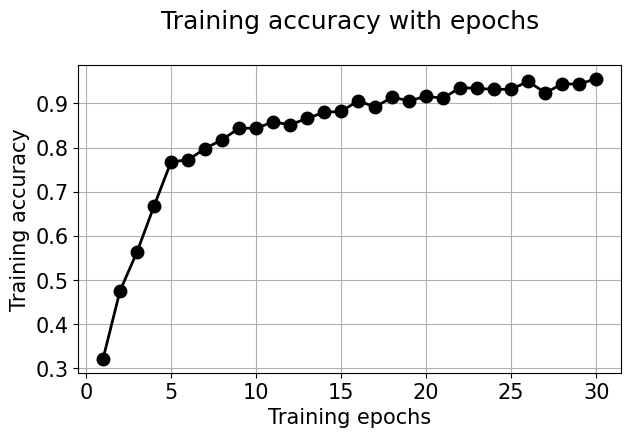

In [16]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [17]:
model.save('SoilPredictor.h5')

In [ ]:
model.evaluate()